In [10]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [11]:
with open('intents.json') as file:
    data = json.load(file)
    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [12]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [13]:
vocab_size = 1000
embedding_dim = 16
max_len = 50
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu')) #classification
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['Accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 7)                 119       
                                                                 
Total params: 16,663
Trainable params: 16,663
Non-trainable params: 0
__________________________________________________

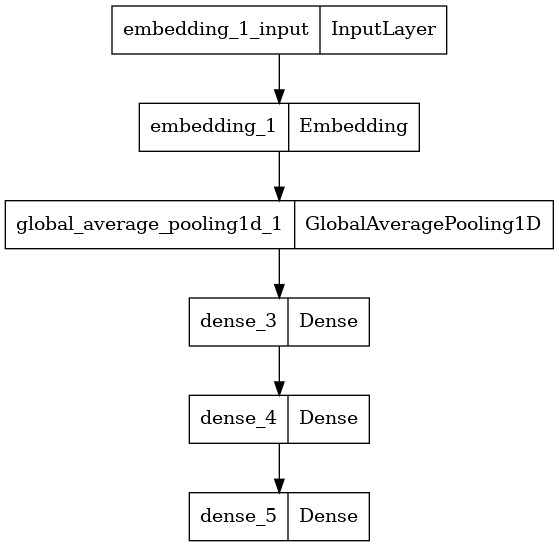

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [16]:

epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/500
1/1 [==============================] - 0s 463ms/step - loss: 1.9437 - Accuracy: 0.3000
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 1.9425 - Accuracy: 0.2000
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 1.9412 - Accuracy: 0.3000
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 1.9400 - Accuracy: 0.2333
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 1.9388 - Accuracy: 0.2333
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 1.9375 - Accuracy: 0.2333
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 1.9363 - Accuracy: 0.2333
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 1.9351 - Accuracy: 0.2333
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 1.9339 - Accuracy: 0.2333
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 1.9326 - Accuracy: 0.2333
Epoch 11/500
1/1 [=======

In [17]:
# to save the trained model
model.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


In [2]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 50
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
1/1 [==============================] - 0s 197ms/step
ChatBot: Fine thankyou
1/1 [==============================] - 0s 33ms/step
ChatBot: Hi
1/1 [==============================] - 0s 47ms/step
ChatBot: I'm 'Big News' Morgans, an Artificial Intelligent bot
1/1 [==============================] - 0s 38ms/step
ChatBot: Yes Sure, How can I support you
1/1 [==============================] - 0s 53ms/step
ChatBot: Practice One at the Japanese F1 Haas Mick Schumacher aquaplanes and crashes into the barrier after the end of Practice One at the Japanese F1 Haas Mick Schumacher and Nico Hulkenberg are battling it out for a 2023 seat Haas
1/1 [==============================] - 0s 29ms/step
ChatBot: Mauro Forghieri was asked by founder Enzo Ferrari to take over technical side of team in 1961 . Forghieri was asked by founder Enzo Ferrari to take over technical side of team . Forghieri was just 27 when Enzo Ferrari asked him to take over design of their